#Sunburst Zero Emissions Ipython notebook by Rahool K.

%Based on paper: Davis et al., Science 360, 1419 (2018) 29 June 2018

%This paper is titled "Net-zero emissions energy systems"

% Main Point of Paper: In order to eliminate CO2 emissions, there are certain difficult to eliminate emissions industries like Load-Following electricity, Iron & Stell, Cement, Shipping, Aviation, and Long-Distance Road Transport. The paper analyzes each of these industries and offers valuable methods to mitigate the CO2 intensive processes.

% Data is cited from G. Janssens-Maenhout et al., EDGAR v4.3.2 Global Atlas of the three major greenhouse gas emissions for the period 1970-2012. Earth System Science Data, (2017

% Data URL: https://www.earth-syst-sci-data-discuss.net/essd-2017-79/essd-2017-79.pdf

% Data for Load-Following Electricity: https://reader.elsevier.com/reader/sd/CEEA1CA219B4280EC5C2FFC0A349182E96E6F328E9865A2C7216C1E6C32867F507520BB8864ADF9893AB6811ABB2E0CF

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sunburst(nodes, total=np.pi * 2, offset=0, level=0, ax=None):
    fig = plt.figure(figsize=(40,40))
    ax = ax or fig.add_subplot(111, projection='polar')
    #ax = ax or plt.subplot(111, projection='polar')
    #ax = ax.add_axes([0.30, 0.2, 1, 1], polar=True)
    
    
    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [1], [np.pi * 2])
        ax.text(0, 0, label, ha='center', va='center')
        sunburst(subnodes, total=value, level=level + 1, ax=ax)
        
    elif nodes:
        d = np.pi * 2 / total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            labels.append(label)
            widths.append(value * d)
            sunburst(subnodes, total=total, offset=local_offset,
                     level=level + 1, ax=ax)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [1] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level - 0.5
        rects = ax.bar(values, heights, widths, bottoms, linewidth=1,
                       edgecolor='white', align='edge')
        for rect, label in zip(rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            y = rect.get_y() + rect.get_height() / 2
            rotation = (90 + (360 - np.degrees(x) % 180)) % 360
            ax.text(x, y, label, rotation=rotation, ha='center', va='center') 
        
    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('N')
        ax.set_axis_off()
        

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


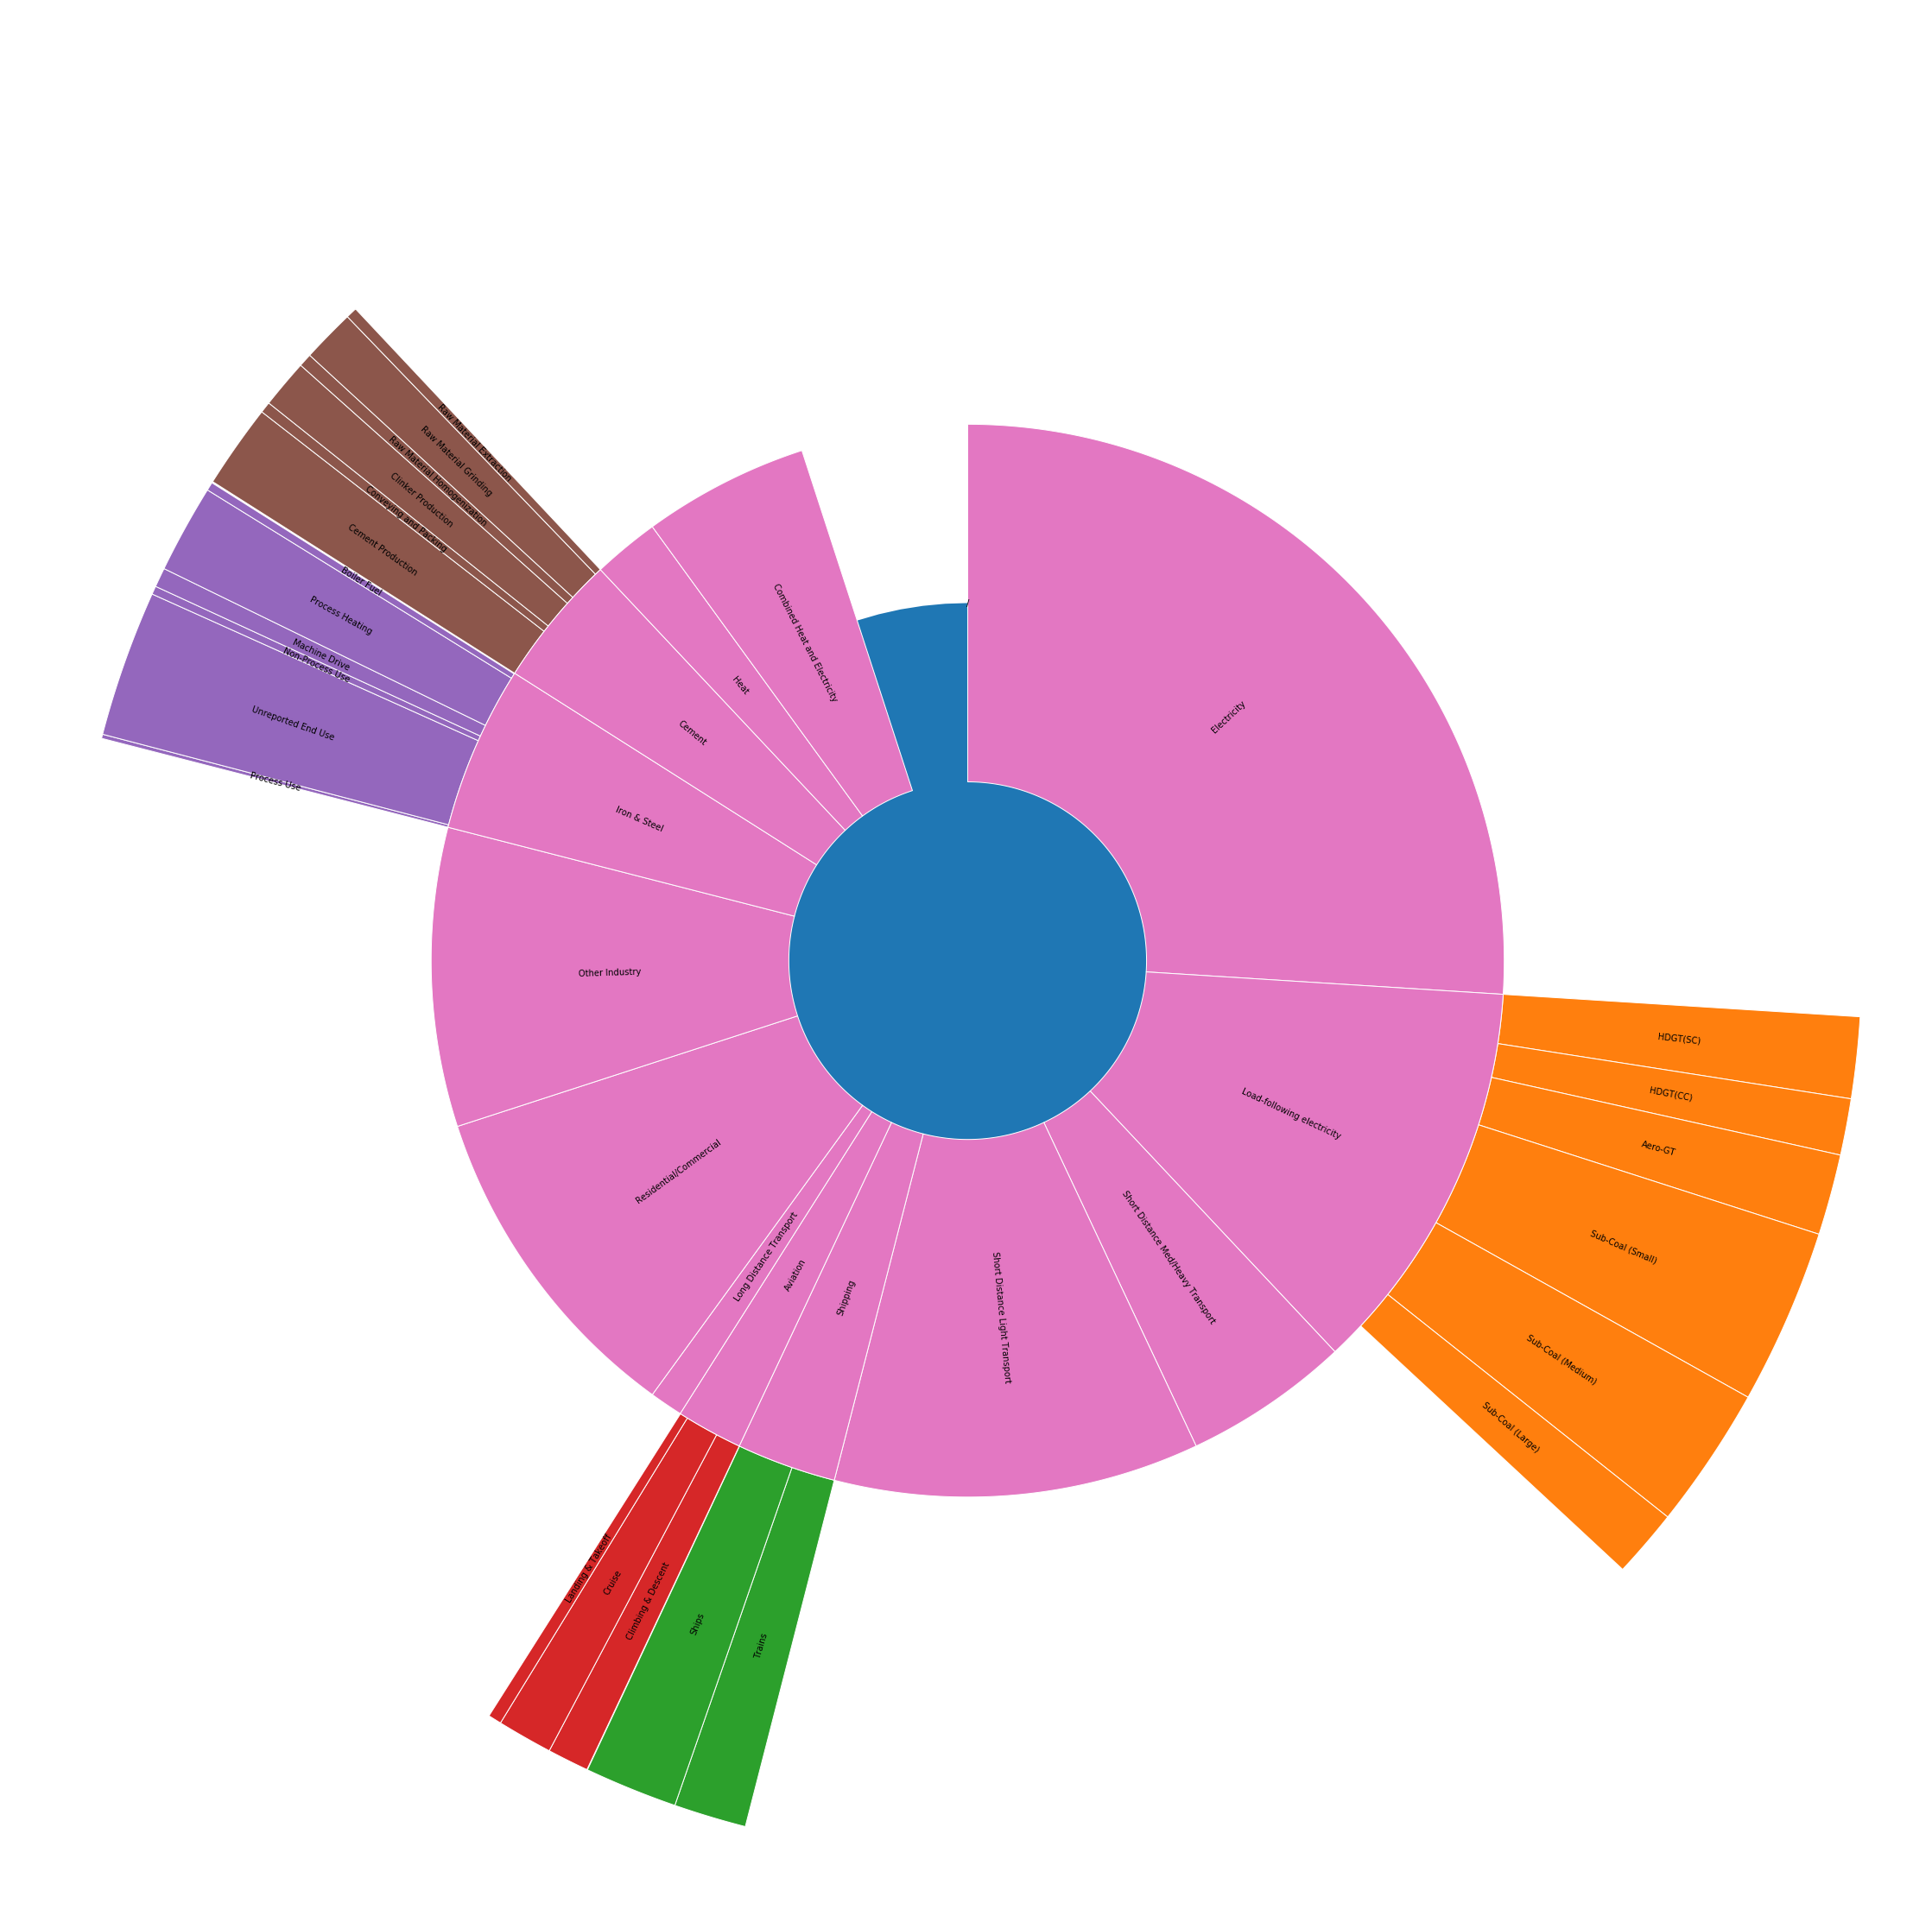

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

In [7]:
data = [
    ('/', 100, [
        ('Electricity', 26, [

        ]),
        ('Load-following electricity', 12, [
            ('HDGT(SC)', 1.47, []),
            ('HDGT(CC)', 1.02, []),
            ('Aero-GT', 1.46, []),
            ('Sub-Coal (Small)', 3.17, []),
            ('Sub-Coal (Medium)', 2.57, []),
            ('Sub-Coal (Large)', 1.23, []),
        ]),
        ('Short Distance Med/Heavy Transport', 5, [
   
        ]),
        ('Short Distance Light Transport', 11, [

        ]),
        ('Shipping', 3, [
            ('Trains', 1.31, []),
            ('Ships', 1.68, []),
        ]),
        ('Aviation', 2, [
            ('Climbing & Descent', 0.75, []),
            ('Cruise', 1, []),
            ('Landing & Takeoff', 0.24, []),
            
        ]),
        ('Long Distance Transport', 1, [
        ]),
        ('Residential/Commercial', 10, [
    
        ]),
        ('Other Industry', 9, [

        ]),
        ('Iron & Steel', 5, [
            ('Process Use', 0.075, []),
            ('Unreported End Use', 2.65, []),
            ('Non-Process Use', 0.15, []),
            ('Machine Drive', 0.35, []),
            ('Process Heating', 1.6, []),
            ('Boiler Fuel', 0.15, []),
        ]),
        ('Cement', 4, [
            ('Cement Production', 1.52, []),
            ('Conveying and Packing', 0.2, []),
            ('Clinker Production', 0.88, []),
            ('Raw Material Homogenization', 0.24, []),
            ('Raw Material Grinding', 0.96, []),
            ('Raw Material Extraction', 0.2, []),
            
        ]),
        ('Heat', 2, [


        ]),
        ('Combined Heat and Electricity', 5, [

        ]),
       
    ]),
]

f=sunburst(data)